In [ ]:
!pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

**Importing necessary libraries**

In [ ]:
import chess
import random
import math
from stockfish import Stockfish
import time
counter=0
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
chess.Board().fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [ ]:
class TreeNode2():
    # class constructor (create tree node class instance)
    def __init__(self, board, parent):
        # init associated board state which is board.__str__()
        self.position = board.__str__()

        self.legal_moves = board.legal_moves

        self.is_checkmate = board.is_checkmate()

        self.fen = board.fen()

        self.turn = board.turn

        # init is node terminal flag
        if board.is_game_over():
            # we have a terminal node
            self.is_terminal = True
            self.winner = board.outcome().winner

        # otherwise
        else:
            # we have a non-terminal node
            self.is_terminal = False

        # init is fully expanded flag
        self.is_fully_expanded = self.is_terminal

        # init parent node if available
        self.parent = parent

        # init the number of node visits
        self.visits = 0

        # init the total score of the node
        self.score = 0

        # init current node's children
        self.children = {}

In [ ]:
# MCTS class definition
class MCTS2():
    def __init__(self):
        self.stockfish = Stockfish(path="/home/sohaib/Downloads/stockfish-ubuntu-x86-64-vnni512")
        self.stockfish.set_depth(7)
    def search_existing_tree(self,node):
        for iteration in range(100):
            # select a node (selection phase)
            # node = self.select(self.root)

            # scrore current node (simulation phase)
            score, final_node = self.rollout(node)

            # backpropagate results
            self.backpropagate(final_node, score)

        return node

    # search for the best move in the current position
    def search(self,board):
        # create root node
        self.root = TreeNode2(board, None)
        # walk through 1000 iterations
        for iteration in range(200):
            # select a node (selection phase)
            # node = self.select(self.root)

            # scrore current node (simulation phase)
            score, final_node = self.rollout(self.root)

            # backpropagate results
            self.backpropagate(final_node, score)

        return self.root

    # select most promising node
    def select(self, node):
        # make sure that we're dealing with non-terminal nodes
        while not node.is_terminal:
            # case where the node is fully expanded
            if node.is_fully_expanded:
                node = self.get_best_move(node, 2)

            # case where the node is not fully expanded
            else:
                # otherwise expand the node
                return self.expand(node)

        # return node
        return node

    # expand node
    def expand(self, node):
        # generate legal states (moves) for the given node
        self.stockfish.set_fen_position(node.fen)
        top_moves = self.stockfish.get_top_moves(5)

        # loop over generated states (moves)
        for move in top_moves:
            move = move['Move']
            # make sure that current state (move) is not present in child nodes
            if move not in node.children:
                # create a new node
                new_board = chess.Board(node.fen)
                new_board.push_san(move)
                new_node = TreeNode2(new_board, node)
                del new_board

                # add child node to parent's node children list (dict)
                node.children[move] = new_node

                # case when node is fully expanded
                if len(top_moves) == len(node.children):
                    node.is_fully_expanded = True

                # return newly created node
                return new_node

        # debugging
        print('Should not get here!!!')

    # simulate the game via making random moves until reach end of the game
    def rollout(self, node):
        # make random moves for both sides until terminal state of the game is reached
        while not node.is_terminal:
            node = self.select(node)

        # return score from the player "x" perspective
        if node.is_checkmate:
            if node.winner == True:
                return 1, node
            else:
                return -1, node
        else:
            return 0, node

    # backpropagate the number of visits and score up to the root node
    def backpropagate(self, node, score):
        # update nodes's up to root node
        while node is not None:
            # update node's visits
            node.visits += 1

            # update node's score
            node.score += score

            # set node to parent
            node = node.parent

    # select the best node basing on UCB1 formula
    def get_best_move(self, node, exploration_constant):
        # define best score & best moves

        best_moves = []
        if node.turn == True:
            best_score = float('-inf')
        else:
            best_score = float('inf')
        # loop over child nodes
        for child_node in node.children.values():
            # define current player
            # if child_node.board.player_2 == 'x': current_player = 1
            # elif child_node.board.player_2 == 'o': current_player = -1

            # get move score using UCT formula
            move_score = child_node.score / child_node.visits + exploration_constant * math.sqrt(math.log(node.visits / child_node.visits))

            if node.turn == True:
                # better move has been found
                if move_score > best_score:
                    best_score = move_score
                    best_moves = [child_node]
                # found as good move as already available
                elif move_score == best_score:
                    best_moves.append(child_node)
            else:
                # better move has been found
                if move_score < best_score:
                    best_score = move_score
                    best_moves = [child_node]
                # found as good move as already available
                elif move_score == best_score:
                    best_moves.append(child_node)

        # return one of the best moves randomly
        return random.choice(best_moves)

    # def get_matched_child(self,turn,position):
    #     if prev_node == None:
    #         return self.root
    #     for child_node in prev_node.children.values():
    #         if child_node.board.position == curr_board.position:
    #             return child_node





In [ ]:
test_board_2 = chess.Board()
darakht_2 = MCTS2()
tree_2 = darakht_2.search(test_board_2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sohaib/Downloads/stockfish-ubuntu-x86-64-vnni512'

In [ ]:
test_node_2 = tree_2
count_2 = 0
while not test_node_2.is_terminal:
    count_2+=1
    temp = darakht_2.get_best_move(test_node_2,2)
    print(temp.position)
    print("_____________________")
    test_node_2 = temp
print(test_node_2.winner)
print(count_2)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R
_____________________
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R
_____________________
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . . . . . .
. P . . P . . .
P . P P . P P P
R N B Q K B N R
_____________________
r n b q k b . r
p p . p p p p p
. . p . . n . .
. . . . . . . .
. . . . . . . .
. P . . P . . .
P . P P . P P P
R N B Q K B N R
_____________________
r n b q k b . r
p p . p p p p p
. . p . . n . .
. . . . . . . .
. . . P . . . .
. P . . P . . .
P . P . . P P P
R N B Q K B N R
_____________________
r n b q k b . r
p p . . p p p p
. . p . . n . .
. . . p . . . .
. . . P . . . .
. P . . P . . .
P . P . . P P P
R N B Q K B N R
_____________________
r n b q k b . r
p p . . p p p p
. . p . . n . .
. . . p . . . .
. . . P . . . .
. P . B P . . .
P . 

In [ ]:
darakht_2 = MCTS2()
tree_2_extended = darakht_2.search_existing_tree(tree_2)

In [ ]:
test_node_2_extended = tree_2_extended
count_2 = 0
while not test_node_2_extended.is_terminal:
    count_2+=1
    temp = darakht_2.get_best_move(test_node_2_extended,2)
    print(temp.position)
    print("_____________________")
    test_node_2_extended = temp
print(test_node_2_extended.winner)
print(count_2)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R
_____________________
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R
_____________________
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . P . . . . .
. . N . . . . .
P P . P P P P P
R . B Q K B N R
_____________________
r n b q k b n r
p p . p . p p p
. . . . p . . .
. . p . . . . .
. . P . . . . .
. . N . . . . .
P P . P P P P P
R . B Q K B N R
_____________________
r n b q k b n r
p p . p . p p p
. . . . p . . .
. . p . . . . .
. . P . . . . .
. . N P . . . .
P P . . P P P P
R . B Q K B N R
_____________________
r n b q k b n r
p . . p . p p p
. p . . p . . .
. . p . . . . .
. . P . . . . .
. . N P . . . .
P P . . P P P P
R . B Q K B N R
_____________________
r n b q k b n r
p . . p . p p p
. p . . p . . .
. . p . . . . .
. . P . . . . .
. . N P . N . .
P P 

**Some utility functions for getting boards from MCTS and converting it into x and y train**

In [ ]:
def get_move_from_fens(fen1, fen2):
  """
  This function takes two FEN strings representing consecutive chess positions
  and returns the move played between them.

  Args:
      fen1: The FEN string for the starting position.
      fen2: The FEN string for the position after the move.

  Returns:
      A string representing the move played, or None if the FENs are invalid
      or the move cannot be determined.
  """
  board1 = chess.Board(fen1)
  board2 = chess.Board(fen2)

  # Iterate through all legal moves of the first position
  for move in board1.legal_moves:
    board1.push(move)
    if board1.fen() == fen2:
      # Found the move that leads to the second position
        return str(move)
    board1.pop()  # Undo the move

  # Move not found, return None
  return None

In [ ]:
def storeBoardsFromTree(node, mcts):
        list = []
        if not chess.Board(node.fen).is_game_over():
            for key, value in node.children.items():
              if value == mcts.get_best_move(node,2):
                move = key
                list.append(convert_node_to_eight_boards(node, move))
                break  # Exit the loop after finding a match
        for child_node in node.children.values():
            for x in storeBoardsFromTree(child_node, mcts):
                list.append(x)
        return list
def count_nodes(node):
    counter = 0
    if node is None:
        return 0
    elif node.parent is None:
        counter = 1
    for child_node in node.children.values():
        counter = counter + 1 + count_nodes(child_node)
    return counter
def convert_node_to_eight_boards(node, move):
    arr = []
    arr.append(chess.Board(node.fen))
    count = 7
    while len(arr) < 8:
        if node.parent == None:
            for i in range(count):
                arr.append(0)
            break
        else:
            node = node.parent
            arr.append(chess.Board(node.fen))
            count -= 1
    arr.append(move)
    return arr

In [ ]:
boards = storeBoardsFromTree(tree_2, MCTS2())
print(len(boards))
print(boards[0][8])
print(count_nodes(tree_2))
boards[1][0]

NameError: name 'tree_2' is not defined

In [ ]:
print(len(boards))
print(count_nodes(tree_2))
print(boards[37902][8])
boards[500][8]

38637
38840
f3g5


'f1f4'

**Preparing initial x and y train objects**


In [ ]:
x_train = []
y_train = []
for x in boards:
    x_train.append([x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7]])
    y_train.append(x[8])
print(len(x_train),len(y_train))

38637 38637


In [ ]:
print(type(y_train[919]))
x_train[919]

<class 'str'>


[Board('8/1K6/8/8/8/8/8/k3q3 b - - 132 233'),
 Board('8/8/K7/8/8/8/8/k3q3 w - - 131 233'),
 Board('8/4q3/K7/8/8/8/8/k7 b - - 130 232'),
 Board('8/1K2q3/8/8/8/8/8/k7 w - - 129 232'),
 Board('8/1K6/8/8/8/8/8/k3q3 b - - 128 231'),
 Board('8/8/K7/8/8/8/8/k3q3 w - - 127 231'),
 Board('8/4q3/K7/8/8/8/8/k7 b - - 126 230'),
 Board('8/1K2q3/8/8/8/8/8/k7 w - - 125 230')]

**Handling inputs**

In [ ]:
import chess

def create_empty_board_array():
    return [[0] * 8 for _ in range(8)]

def create_piece_arrays(board):
    piece_symbols = ["P", "N", "B", "R", "Q", "K"]
    white_pieces = {symbol: create_empty_board_array() for symbol in piece_symbols}
    black_pieces = {symbol.lower(): create_empty_board_array() for symbol in piece_symbols}

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece is not None:
            piece_name = piece.symbol()
            file_idx = square % 8
            rank_idx = 7 - square // 8  # Invert rank to match the board orientation
            if piece.color == chess.WHITE:
                white_pieces[piece_name][rank_idx][file_idx] = 1
            else:
                black_pieces[piece_name.lower()][rank_idx][file_idx] = 1

    return white_pieces, black_pieces

def append_piece_arrays(pieces,input_array):
    for piece_name, array in pieces.items():
        input_array.append(array)

In [ ]:
import chess

def create_castling_arrays(board):
    white_kingside_castle = [[int(board.has_kingside_castling_rights(chess.WHITE))]*8] * 8
    white_queenside_castle = [[int(board.has_queenside_castling_rights(chess.WHITE))]*8] * 8
    black_kingside_castle = [[int(board.has_kingside_castling_rights(chess.BLACK))]*8] * 8
    black_queenside_castle = [[int(board.has_queenside_castling_rights(chess.BLACK))]*8] * 8

    return white_kingside_castle, white_queenside_castle, black_kingside_castle, black_queenside_castle

def append_castling_arrays(arrays,input_array):
    names = ["White Kingside", "White Queenside", "Black Kingside", "Black Queenside"]
    for name, array in zip(names, arrays):
        input_array.append(array)


In [ ]:
import chess

def create_turn_array(board):
    turn_array = [[int(board.turn)] * 8 for _ in range(8)]
    return turn_array

def append_turn_array(array,input_array):
    input_array.append(array)
    # print("Turn Array:")
    # for row in array:
    #     print(row)




In [ ]:
def get_inputs_by_board(board):
    if board == 0:
        empty_array = [list(list(0 for i in range(8)) for j in range(8))] * 17
        return empty_array

    input_array=[]
    # Get the piece arrays for White and Black players
    white_pieces, black_pieces = create_piece_arrays(board)

    # Print the piece arrays
    append_piece_arrays(white_pieces,input_array)
    append_piece_arrays(black_pieces,input_array)

    #Get castling arrays
    white_kingside, white_queenside, black_kingside, black_queenside = create_castling_arrays(board)

    # Print the castling arrays
    append_castling_arrays([white_kingside, white_queenside, black_kingside, black_queenside],input_array)

    # Get the turn array
    turn_array = create_turn_array(board)

    # Print the turn array
    append_turn_array(turn_array,input_array)

    # input_array.append(encode_move_counters(board))

    return input_array





**Outputs handling**

In [ ]:
import chess


def get_queen_knight_moves(output_list):
    # Create a board
    board = chess.Board()

    # Dictionary to store all possible moves for each piece
    all_possible_moves = {}

    # Iterate through each square of the board
    for square in chess.SQUARES:
        # Iterate through each piece type
        for piece_type in [chess.KNIGHT, chess.QUEEN]:
            # Create a new board with the current piece at the current square
            board.clear()

            board.set_piece_at(square, chess.Piece(piece_type, True))  # Assuming it's a white piece for simplicity

            # Get all possible moves for the piece on the current square
            possible_moves = board.attacks(square)
            legal_moves_list = board.legal_moves
            for move in legal_moves_list:
                output_list.append(move.__str__())

            # Store the possible moves in the dictionary
            all_possible_moves[(piece_type, square)] = possible_moves

    return output_list



In [ ]:
import chess

# Function to find all promotion moves including promotions to other pieces
def find_promotion_moves(board, color):
    promotion_moves = []
    legal_moves_list = board.legal_moves
    for move in legal_moves_list:
        if move.promotion is not None and board.turn == color:
            promotion_moves.append(move)

    return promotion_moves

def get_pawn_moves(output_list):
    # Create a chess board
    board = chess.Board(fen='8/8/8/8/8/8/8/8 w - - 0 1')

    # Place white pawns on every square of the 7th rank
    for file_idx in range(8):
        board.set_piece_at(chess.square(file_idx, 6), chess.Piece(chess.PAWN, chess.WHITE))

    # Place black pawns on every square of the 2nd rank
    for file_idx in range(8):
        board.set_piece_at(chess.square(file_idx, 1), chess.Piece(chess.PAWN, chess.BLACK))

    # Get all possible promotion moves for white pawns
    white_promotion_moves = find_promotion_moves(board, chess.WHITE)
    for move in white_promotion_moves:
        output_list.append(move.__str__())

    # Switch turn to black
    board.turn = chess.BLACK

    # Get all possible promotion moves for black pawns
    black_promotion_moves = find_promotion_moves(board, chess.BLACK)
    # output_list.append(move.__str__() for move in black_promotion_moves)
    for move in black_promotion_moves:
        output_list.append(move.__str__())

    # Place white pawns on every square of the 7th rank
    for file_idx in range(8):
        board.set_piece_at(chess.square(file_idx, 7), chess.Piece(chess.KNIGHT, chess.BLACK))

    # Place black pawns on every square of the 2nd rank
    for file_idx in range(8):
        board.set_piece_at(chess.square(file_idx, 0), chess.Piece(chess.KNIGHT, chess.WHITE))

    board.turn = chess.WHITE

    # Get all possible promotion moves for white pawns
    white_promotion_moves = find_promotion_moves(board, chess.WHITE)
    # output_list.append(move.__str__() for move in white_promotion_moves)
    for move in white_promotion_moves:
        output_list.append(move.__str__())

    board.turn = chess.BLACK

    # Get all possible promotion moves for black pawns
    black_promotion_moves = find_promotion_moves(board, chess.BLACK)
    for move in black_promotion_moves:
        output_list.append(move.__str__())

    return output_list


In [ ]:
import chess

def get_outputs():
   output_list = []

   output_list.append(move for move in get_queen_knight_moves(output_list))

   get_pawn_moves(output_list)

   return output_list

output_list = get_outputs()

**Making functions to convert initial x and y train to be model compatible**

In [ ]:
def make_final_y_train(initial_y_train):
  final_y_train = []
  output_list = get_outputs()

  for move in initial_y_train:
    try:
      index = output_list.index(move)
    except:
      print("Error in training")
    final_y_train.append(index)

  return final_y_train

In [ ]:
def make_final_x_train(initial_x_train):
  finalest_x_train = []
  for board_array in initial_x_train:
    final_x_train = []
    for board in board_array:
        final_x_train.append(get_inputs_by_board(board))
    finalest_x_train.append(final_x_train)

  return finalest_x_train

In [ ]:
final_x_train = make_final_x_train(x_train)
final_y_train = make_final_y_train(y_train)
import numpy as np  # Assuming it's a NumPy array

# Assuming final_x_train is your array
print("Shape of final_x_train:", len(final_x_train))


**Storing x_train and y_train in json files**

In [ ]:
import json
import numpy as np


# Convert the NumPy array to a Python list
final_x_train_list = final_x_train

final_y_train_list = final_y_train

# Write the list to a JSON file
with open('y_train.json', 'w') as f:
    json.dump(final_y_train_list, f)

# Read the JSON file and load its content into a list
with open('x_train.json', 'w') as f:
    json.dump(final_x_train_list, f)

TypeError: Object of type Board is not JSON serializable

**Loading x_train and y_train from json files**

In [ ]:
import json
import numpy as np


# # Convert the NumPy array to a Python list

with open('/content/drive/MyDrive/final_x_train.json', 'r') as f:
    loaded_list = json.load(f)

# Convert the loaded list back to a NumPy array if needed
final_x_train = np.array(loaded_list)

with open('/content/drive/MyDrive/final_y_train.json', 'r') as f:
    loaded_list = json.load(f)

# Convert the loaded list back to a NumPy array if needed
final_y_train = np.array(loaded_list)
final_y_train.shape
# # Check if the original array and the loaded array are equal
# print(np.array_equal(final_x_train, loaded_array))  # Output: True


KeyboardInterrupt: 

In [ ]:
import numpy as np

unique_numbers, counts = np.unique(final_y_train, return_counts=True)
count_final=0
for num, count in zip(unique_numbers, counts):
        if num>1800:
           print(num)
        count_final+=1
print(count_final)


1802
1806
1808
1809
1811
1812
1813
1816
1817
1820
1825
1829
1830
1834
1835
1837
1838
1840
1925
1813


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_x_train = np.array(final_x_train)
final_y_train = np.array(final_y_train)

In [ ]:
final_x_train.shape

(38637, 8, 17, 8, 8)

**Training model**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
model = Sequential()

model.add(Flatten(input_shape=(8,17,8,8)))
# model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1969,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(final_x_train,final_y_train,epochs=200,validation_split=0.2)

Epoch 1/200
966/966 [==============================] - 12s 11ms/step - loss: 6.8854 - accuracy: 0.0115 - val_loss: 6.6779 - val_accuracy: 0.0098
Epoch 2/200
966/966 [==============================] - 12s 13ms/step - loss: 6.3967 - accuracy: 0.0221 - val_loss: 6.5709 - val_accuracy: 0.0182
Epoch 3/200
966/966 [==============================] - 10s 11ms/step - loss: 6.1288 - accuracy: 0.0328 - val_loss: 6.5250 - val_accuracy: 0.0304
Epoch 4/200
966/966 [==============================] - 10s 10ms/step - loss: 5.8686 - accuracy: 0.0474 - val_loss: 6.4496 - val_accuracy: 0.0348
Epoch 5/200
966/966 [==============================] - 15s 16ms/step - loss: 5.6300 - accuracy: 0.0601 - val_loss: 6.4809 - val_accuracy: 0.0391
Epoch 6/200
966/966 [==============================] - 11s 11ms/step - loss: 5.4214 - accuracy: 0.0753 - val_loss: 6.5483 - val_accuracy: 0.0441
Epoch 7/200
966/966 [==============================] - 11s 12ms/step - loss: 5.2293 - accuracy: 0.0922 - val_loss: 6.6123 - val_ac

In [ ]:
def create_model():
  model = Sequential()

  model.add(Flatten(input_shape=(8,17,8,8)))
  # model.add(Dense(128,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1969,activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model

**Testing model on samples**

In [ ]:
# Save the weights

# model.save_weights('/content/drive/MyDrive/checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('/content/drive/MyDrive/checkpoints/my_checkpoint')

# Continue training the model
# history = model.fit(final_x_train,final_y_train,epochs=1,validation_split=0.2)


print("Restored model: " , model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8704)              0         
                                                                 
 dense (Dense)               (None, 32)                278560    
                                                                 
 dense_1 (Dense)             (None, 1969)              64977     
                                                                 
Total params: 343537 (1.31 MB)
Trainable params: 343537 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Restored model:  None


TESTING CELLS START(DELETE LATER)

In [ ]:
model.save('test_save.h5')

In [ ]:
model= keras.models.load_model('test_save.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8704)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                278560    
                                                                 
 dense_3 (Dense)             (None, 1969)              64977     
                                                                 
Total params: 343537 (1.31 MB)
Trainable params: 343537 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
!zip -r hello/file2.zip test_save/

  adding: test_save/ (stored 0%)
  adding: test_save/assets/ (stored 0%)
  adding: test_save/fingerprint.pb (stored 0%)
  adding: test_save/variables/ (stored 0%)
  adding: test_save/variables/variables.index (deflated 49%)
  adding: test_save/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: test_save/saved_model.pb (deflated 85%)
  adding: test_save/keras_metadata.pb (deflated 84%)


TESTING CELLS END

In [ ]:
board = chess.Board()

In [ ]:
while not board.is_game_over():
    x_test = np.array([get_inputs_by_board(board)])
    y_prob = model.predict(x_test)
    while True:
        try:
            y_pred = y_prob.argmax(axis=1)
            move = get_outputs()[y_pred[0]]
            board.push_san(move)
            break
        except:
            y_prob[0][y_prob.argmax(axis=1)[0]] = 0
    print(board)
board

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 8, 17, 8, 8), found shape=(None, 17, 8, 8)


In [ ]:
y_prob.argmax(axis=1)[0]

NameError: name 'y_prob' is not defined

In [ ]:
board.push_san('c6d4')
board

IllegalMoveError: no matching legal move for c6d4 (c6 -> d4) in rnbqkb1r/ppp1pppp/5n2/3p4/3P1B2/2N5/PPP1PPPP/R2QKBNR b KQkq - 1 3

**Code to test model on test data**

In [ ]:
class TestNode():
   def __init__(self,board,parent):
      self.board = board
      self.parent = parent
      self.fen = board.fen()



board = chess.Board()
node = TestNode(board,None)

def execute_logic(node,move):
  new_board = chess.Board(node.fen)
  new_board.push_san(move)
  # if new_board.is_game_over():
  #    return
  new_node = TestNode(new_board, node)
  # execute_logic(new_node)
  return new_node

def convert_test_node_to_eight_boards(node):
    arr = []
    arr.append(chess.Board(node.fen))
    while len(arr) < 8:
        if node.parent == None:
            arr += [0] * (8 - len(arr))
            break
        else:
            node = node.parent
            arr.append(chess.Board(node.fen))
    return arr

board = chess.Board()
node = TestNode(board,None)

# while True:
#     boards_of_node = convert_test_node_to_eight_boards(node)
#     x_test = []
#     for board in boards_of_node:
#         x_test.append(get_inputs_by_board(board))
#     y_prob = model.predict([x_test])
#     while True:
#         try:
#             y_pred = y_prob.argmax(axis=1)
#             move = get_outputs()[y_pred[0]]
#             node = execute_logic(node,move)
#             break
#         except:
#             y_prob[0][y_prob.argmax(axis=1)[0]] = 0
#     if node.board.is_game_over():
#        break

# node.board

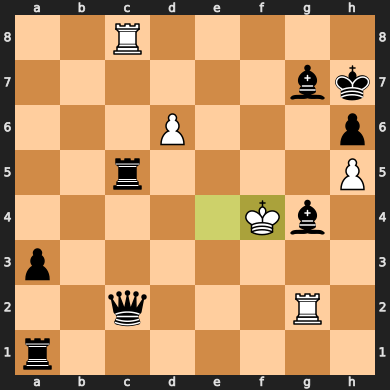

In [ ]:
node.parent.parent.parent.parent.parent.board

**Play Against Human**

In [ ]:
pve_board = chess.Board()
pve_node = TestNode(board,None)

while True:
  if pve_node.board.is_game_over():
       break
  if pve_node.board.turn:
    while True:
        try:
            print(pve_node.board)
            move = input("Enter your move: ")
            pve_node = execute_logic(pve_node,move)
            break
        except:
            print("Illegal Move, try again.")
  else:
    boards_of_node = convert_test_node_to_eight_boards(pve_node)
    x_test = []
    for board in boards_of_node:
          x_test.append(get_inputs_by_board(board))
    y_prob = model.predict([x_test])
    while True:
        try:
            y_pred = y_prob.argmax(axis=1)
            move = get_outputs()[y_pred[0]]
            pve_node = execute_logic(pve_node,move)
            break
        except:
            y_prob[0][y_prob.argmax(axis=1)[0]] = 0

pve_node.board

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
1/1 [==============================] - 0s 44ms/step
r n b q k b n r
p p p p p p . p
. . . . . . p .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
1/1 [==============================] - 0s 37ms/step
r . b q k b n r
p p p p p p . p
. . n . . . p .
. . . . P . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
1/1 [==============================] - 0s 44ms/step
r . b q k b . r
p p p p p p . p
. . n . P n p .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
Illegal Move, try again.
r . b q k b . r
p p p p p p . p
. . n . P n p .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
1/1 [==============================] - 0s 40ms/step
r . b q . b . r
p p p p p k . p
. . n . . n p .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R

**Code for model to mcts**

In [ ]:
class TreeNode3():
    # class constructor (create tree node class instance)
    def __init__(self, board, parent):
        # init associated board state which is board.__str__()
        self.position = board.__str__()

        self.legal_moves = list(x.__str__() for x in board.legal_moves)

        self.is_checkmate = board.is_checkmate()

        self.fen = board.fen()

        self.turn = board.turn

        if board.is_game_over():
            # we have a terminal node
            self.is_terminal = True
            self.winner = board.outcome().winner

        # otherwise
        else:
            # we have a non-terminal node
            self.is_terminal = False

        # init is fully expanded flag
        self.is_fully_expanded = self.is_terminal

        # init parent node if available
        self.parent = parent

        # init the number of node visits
        self.visits = 0

        # init the total score of the node
        self.score = 0

        # init current node's children
        self.children = {}

In [ ]:
class MCTS3():
    def __init__(self, model):
      self.model = model
    def convert_node_to_input(self, node):
      boards_of_node = convert_test_node_to_eight_boards(node)
      x_test = []
      for board in boards_of_node:
        x_test.append(get_inputs_by_board(board))
      return x_test

    def get_moves_from_input(self, node, input, model):
      y_prob = model.predict([input])
      move_probs = {}
      while len(move_probs)<len(node.legal_moves):
          try:
            # problem seems to be in this block as always highest probable legal move will get into move_probs
              y_pred = y_prob.argmax(axis=1)
              move = get_outputs()[y_pred[0]]
              chess.Board(node.fen).push_san(move)
              move_probs.update({move : y_pred})
          except:
              y_prob[0][y_prob.argmax(axis=1)[0]] = 0
      return move_probs

    def get_best_move_from_input(self, node, input, model):
      y_prob = model.predict([input])
      while True:
          try:
              y_pred = y_prob.argmax(axis=1)
              move = get_outputs()[y_pred[0]]
              chess.Board(node.fen).push_san(move)
              return move
          except:
              y_prob[0][y_prob.argmax(axis=1)[0]] = 0

    def get_moves_from_node(self, node, model):
      input = self.convert_node_to_input(node)
      move_probs = self.get_moves_from_input(node, input, model)
      return move_probs

    def get_best_move_from_node(self, node, model):
      input = self.convert_node_to_input(node)
      move = self.get_best_move_from_input(node, input, model)
      return move

    def search_existing_tree(self,node):
        for iteration in range(100):
            # select a node (selection phase)
            node = self.select(node)

            # scrore current node (simulation phase)
            score, final_node = self.rollout(node)

            # backpropagate results
            self.backpropagate(final_node, score)

        return node

    # search for the best move in the current position
    def search(self,board):
        # create root node
        self.root = TreeNode3(board, None)

        # walk through 1000 iterations
        for iteration in range(1):
            # select a node (selection phase)
            #problem, should call rollout only
            node = self.select(self.root, self.model)

            print("select done")

            # scrore current node (simulation phase)
            score, final_node = self.rollout(self.root, self.model)

            print("rollout done")

            # backpropagate results
            self.backpropagate(final_node, score)

            print("DONEE")

        return self.root

    # select most promising node
    def select(self, node, model):
        # make sure that we're dealing with non-terminal nodes
        while len(node.children) != 0:
            ucb_max = float('-inf')
            ucb = 0
            next_node = None
            for key, value in self.get_moves_from_node(node, model): # problem here as this is index not value
                try:
                  child_node = node.children[key]
                  if node.turn:
                    ucb = self.average_reward(child_node) + self.bonus_reward(child_node, value)
                  else:
                    ucb = ((-1)*self.average_reward(child_node)) + self.bonus_reward(child_node, value)
                  if ucb > ucb_max:
                    ucb_max = ucb
                    next_node = child_node
                except:
                  ucb = self.bonus_reward(None, value)
                  if ucb > ucb_max:
                    ucb_max = ucb
                    next_node = key

            if isinstance(next_node, str):
              new_board = chess.Board(node.fen)
              new_board.push_san(next_node)
              new_node = TreeNode3(new_board, node)
              del new_board

              # add child node to parent's node children list (dict)
              node.children[next_node] = new_node
              node = new_node
            else:
              node = next_node
        # return node
        return node

    # expand node
    def expand(self, node, model):
        move = self.get_best_move_from_node(node, model)
        new_board = chess.Board(node.fen)
        new_board.push_san(move)
        new_node = TreeNode3(new_board, node)
        del new_board

        # add child node to parent's node children list (dict)
        node.children[move] = new_node
        return new_node

    # simulate the game via making random moves until reach end of the game
    def rollout(self, node, model):
        # make random moves for both sides until terminal state of the game is reached
        while not node.is_terminal:
            node = self.expand(node, model) # problem, call get_best_move here

        # return score from the player "x" perspective
        if node.is_checkmate:
            if node.winner == True:
                return 0.5, node
            else:
                return -0.5, node
        else:
            return 0, node

    # backpropagate the number of visits and score up to the root node
    def backpropagate(self, node, score):
        # update nodes's up to root node
        while node is not None:
            # update node's visits
            node.visits += 1

            # update node's score
            node.score += score

            # set node to parent
            node = node.parent

    # select the best node basing on UCB1 formula
    def get_best_move(self, node, exploration_constant):#problem in its implementation
        # define best score & best moves

        best_moves = []

        best_score = float('-inf')
        # loop over child nodes
        for child_node in node.children.values():# problem here as possibly we don't need children here
            # as we are getting them from get_moves_from_node function

            # define current player
            # if child_node.board.player_2 == 'x': current_player = 1
            # elif child_node.board.player_2 == 'o': current_player = -1

            # get move score using UCT formula

            if node.turn == True:
                move_score = self.average_reward(child_node) + self.bonus_reward(child_node)

            else:
                move_score = ((-1) * self.average_reward(child_node)) + self.bonus_reward(child_node)

            # better move has been found
            if move_score > best_score:
                best_score = move_score
                best_moves = [child_node]
            # found as good move as already available
            elif move_score == best_score:
                best_moves.append(child_node)
        # return one of the best moves randomly
        return random.choice(best_moves)

def average_reward(self, node):
    return node.score/node.visits

def bonus_reward(self, node, move_prob):
    if node == None:
      return move_prob
    return move_prob/(1+node.visits)

**Code by Sohaib**

In [ ]:
import math
import time
import numpy as np

total_moves = get_outputs()

class MCTS3():

    def __init__(self, model):
      self.model = model

    def convert_node_to_input(self, node):
      boards_of_node = convert_test_node_to_eight_boards(node)
      x_test = []
      for board in boards_of_node:
        x_test.append(get_inputs_by_board(board))
      return x_test

    def get_moves_from_input(self, node, input, model):
      legal_moves = node.legal_moves
      y_prob = model.predict([input])
      # print(type(y_prob))
      y_prob = np.array([[element + 2 for element in row] for row in y_prob])
      # print(type(y_prob))
      move_probs = {}
      # print(len(node.legal_moves))
      # print(len(y_prob[0]))
      for move in total_moves:
          if move in legal_moves:
             move_probs[move] = y_prob[0][total_moves.index(move)]
      # print(move_probs)
      # while len(move_probs)<len(node.legal_moves):
      #     try:
      #         y_pred = y_prob.argmax(axis=1)
      #         move = get_outputs()[y_pred[0]]
      #         chess.Board(node.fen).push_san(move)
      #         #newly added lines
      #         # if len(move_probs)>15:
      #           # print(y_prob[0][y_prob.argmax(axis=1)[0]])
      #         move_probs[move] = round(y_prob[0][y_prob.argmax(axis=1)[0]]+2,2)
      #         y_prob[0][y_prob.argmax(axis=1)[0]] = 0
      #     except:
      #         y_prob[0][y_prob.argmax(axis=1)[0]] = 0
      # print("yahan ni aa paraha")
      return move_probs

    # def get_best_move_from_input(self, node, input, model):
    #   y_prob = model.predict([input])
    #   while True:
    #       try:
    #           y_pred = y_prob.argmax(axis=1)
    #           move = get_outputs()[y_pred[0]]
    #           chess.Board(node.fen).push_san(move)
    #           return move
    #       except:
    #           y_prob[0][y_prob.argmax(axis=1)[0]] = 0

    def get_moves_from_node(self, node, model):
      # start_time = time.time()
      input = self.convert_node_to_input(node)
      # end_time = time.time()
      # time_difference = end_time - start_time
      # print("Time difference:", time_difference, "seconds")
      # start_time = time.time()
      move_probs = self.get_moves_from_input(node, input, model)
      # end_time = time.time()
      # time_difference = end_time - start_time
      # print("Time difference after:", time_difference, "seconds")
      return move_probs

    # def get_best_move_from_node(self, node, model):
    #   input = self.convert_node_to_input(node)
    #   move = self.get_best_move_from_input(node, input, model)
    #   return move

    def search_existing_tree(self,node):
        for iteration in range(100):
            # select a node (selection phase)
            node = self.select(node)

            # scrore current node (simulation phase)
            score, final_node = self.rollout(node)

            # backpropagate results
            self.backpropagate(final_node, score)

        return node

    # search for the best move in the current position
    def search(self,board):
        # create root node
        self.root = TreeNode3(board, None)

        # walk through 1000 iterations
        for iteration in range(1):
            # scrore current node (simulation phase)
            score, final_node = self.rollout(self.root, self.model)

            # backpropagate results
            self.backpropagate(final_node, score)

        return self.root

    # simulate the game via making random moves until reach end of the game
    def rollout(self, node, model):
        count = 0
        # make random moves for both sides until terminal state of the game is reached
        while not node.is_terminal:
            # print(count)
            # count+=1
            node = self.get_best_move(node) # problem, call get_best_move here

        # return score from the player "x" perspective
        if node.is_checkmate:
            if node.winner == True:
                return 0.5, node
            else:
                return -0.5, node
        else:
            return 0, node

    # backpropagate the number of visits and score up to the root node
    def backpropagate(self, node, score):
        # update nodes's up to root node
        while node is not None:
            # update node's visits
            node.visits += 1

            # update node's score
            node.score += score

            # set node to parent
            node = node.parent

    # select the best node basing on UCB1 formula
    def get_best_move(self, node):#problem in its implementation
        # define best score & best moves
        # print("came here")
        ucb_max = float('-inf')
        ucb = 0
        next_node = None
        # loop over child nodes
        for key, value in self.get_moves_from_node(node, model).items():
                try:
                  # print("in try")
                  child_node = node.children[key]
                  if node.turn:
                    ucb = self.average_reward(child_node) + self.bonus_reward(child_node, value)
                  else:
                    ucb = ((-1)*self.average_reward(child_node)) + self.bonus_reward(child_node, value)
                  if ucb > ucb_max:
                    ucb_max = ucb
                    next_node = child_node
                except: #enters here on divided by zero exception when node.visits == 0
                  ucb = self.bonus_reward(None, value)
                  # print("getting here")
                  if ucb > ucb_max:
                    ucb_max = ucb
                    next_node = key

        if isinstance(next_node, str):
              new_board = chess.Board(node.fen)
              new_board.push_san(next_node)
              new_node = TreeNode3(new_board, node)
              del new_board

              # add child node to parent's node children list (dict)
              node.children[next_node] = new_node
              node = new_node
        else:
              node = next_node

            # get move score using UCT formula
        # print("why not this")
        return node

    def average_reward(self, node):
        return node.score/node.visits

    def bonus_reward(self, node, move_prob):
        if node == None:
          return move_prob
        return move_prob/(1+node.visits)

In [ ]:
darakht_3 = MCTS3(model)
tree_3 = darakht_3.search(chess.Board())

0
1/1 [==============================] - 0s 48ms/step
1
1/1 [==============================] - 0s 50ms/step
2
1/1 [==============================] - 0s 49ms/step
3
1/1 [==============================] - 0s 49ms/step
4
1/1 [==============================] - 0s 53ms/step
5
1/1 [==============================] - 0s 48ms/step
6
1/1 [==============================] - 0s 48ms/step
7
1/1 [==============================] - 0s 49ms/step
8
1/1 [==============================] - 0s 47ms/step
9
1/1 [==============================] - 0s 47ms/step
10
1/1 [==============================] - 0s 48ms/step
11
1/1 [==============================] - 0s 46ms/step
12
1/1 [==============================] - 0s 47ms/step
13
1/1 [==============================] - 0s 46ms/step
14
1/1 [==============================] - 0s 46ms/step
15
1/1 [==============================] - 0s 46ms/step
16
1/1 [==============================] - 0s 45ms/step
17
1/1 [==============================] - 0s 46ms/step
18
1/1 [============

In [ ]:
list(x.__str__() for x in chess.Board().legal_moves)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R
